In [72]:
import pandas as pd
import requests
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model

In [78]:
download_folder = 'dryice_test'

In [80]:
ai_status_df = pd.read_csv(os.path.join(download_folder, 'csvs', 'data_with_ai_labels_new_date.csv'))
ai_status_df.head(2)

,Unnamed: 0,id,amount,date_of_receipt,brand,receipt_number,brand_model,img,status,status_label,...,classifier_exception,file_exists,file_name,file_size_MB,processed_data,m_receipt_date,m_receipt_number,m_brand_model,m_brand,ai_approver_status
0,0,961573,394.0,2024-08-29,Armani Exchange,OR000811,OAX1064,Receipt/2024/mmexport1725432543089.png,1,Approved,...,NaN,Yes,mmexport1725432543089.png,0.048774,"{'m_receipt_date': ['29/08/2024', '29/08/2024'...","['29/08/2024', '29/08/2024', 'Created on 29/08...","['OR000811', 'OR000811']",[],['1 ARMANI EXCHANGE'],Approved
1,1,961572,403.0,2024-08-23,Coach,106700,6215D,Receipt/2024/jpeg_20240904_144621.jpg,1,Approved,...,NaN,Yes,jpeg_20240904_144621.jpg,0.265176,{'m_receipt_date': [': 23/08/2024 03:58:58 PM'...,"[': 23/08/2024 03:58:58 PM', '23/08/2024', '23...","['S118501106700', 'S118501106700']",[],"['FF COACH', 'COACH']",Approved


In [84]:
approved = ai_status_df[ai_status_df['status_label'] == 'Approved']
rejected = ai_status_df[ai_status_df['status_label'] == 'Rejected']
ai_approved = ai_status_df[ai_status_df['ai_approver_status'] == 'Approved']
ai_rejected = ai_status_df[ai_status_df['ai_approver_status'] == 'Rejected']
print(f'total = {len(ai_status_df)} | approved : {len(approved)} | rejected : {len(rejected)} | ai_approved : {len(ai_approved)} | ai_rejected : {len(ai_rejected)}')


total = 2000 | approved : 1941 | rejected : 59 | ai_approved : 1884 | ai_rejected : 116


In [85]:
data_approved_but_ai_rejected = ai_status_df[(ai_status_df['status_label'] == 'Approved') & (ai_status_df['ai_approver_status'] == 'Rejected')]
print(f'AI Rejected But Manual Approved = {len(data_approved_but_ai_rejected)}')
data_approved_but_ai_rejected.head(2)

AI Rejected But Manual Approved = 85


,Unnamed: 0,id,amount,date_of_receipt,brand,receipt_number,brand_model,img,status,status_label,...,classifier_exception,file_exists,file_name,file_size_MB,processed_data,m_receipt_date,m_receipt_number,m_brand_model,m_brand,ai_approver_status
28,28,961545,375.0,2024-06-07,Coach,S120301104361,COASP5168,Receipt/2024/alejvtpcmr.jpg,1,Approved,...,NaN,Yes,alejvtpcmr.jpg,6.571752,{'m_receipt_date': [': 07/06/2024 07:10:11 PM'...,"[': 07/06/2024 07:10:11 PM', '07/06/2024', '07...",[],[],"['FF COACH', 'COACH']",Rejected
48,48,961525,565.0,2024-08-23,Michael Kors,106707,1129J,Receipt/2024/jpeg_20240904_135128.jpg,1,Approved,...,NaN,Yes,jpeg_20240904_135128.jpg,0.049152,"{'m_receipt_date': [], 'm_receipt_number': [],...",[],[],[],[],Rejected


In [86]:
data_rejected_but_ai_Approved = ai_status_df[(ai_status_df['status_label'] == 'Rejected') & (ai_status_df['ai_approver_status'] == 'Approved')]
print(f'AI Approved But Manual Rejected = {len(data_rejected_but_ai_Approved)}')
data_rejected_but_ai_Approved.head(2)

AI Approved But Manual Rejected = 28


,Unnamed: 0,id,amount,date_of_receipt,brand,receipt_number,brand_model,img,status,status_label,...,classifier_exception,file_exists,file_name,file_size_MB,processed_data,m_receipt_date,m_receipt_number,m_brand_model,m_brand,ai_approver_status
94,94,961479,0.0,2024-08-28,Ray-Ban,21604377,OO9417,Receipt/2024/rwk1bc7jlc_fmUgqEM.jpg,2,Rejected,...,NaN,Yes,rwk1bc7jlc_fmUgqEM.jpg,6.122908,"{'m_receipt_date': [': 28/08/2024', '28/08/202...","[': 28/08/2024', '28/08/2024', ': 28/08/2024']","[': 21604377', '21604377']",[],"['RAYBAN', 'RAYBAN CASING', 'RAYBAN', 'RAYBAN']",Approved
95,95,961478,0.0,2024-08-28,Oakley,21604377,OO9417,Receipt/2024/rwk1bc7jlc.jpg,2,Rejected,...,NaN,Yes,rwk1bc7jlc.jpg,6.122908,"{'m_receipt_date': [': 28/08/2024', '28/08/202...","[': 28/08/2024', '28/08/2024', ': 28/08/2024']","[': 21604377', '21604377']","['SOK-009417-03-59', 'SOK-009417-03-59']","['OAKLEY CASING', 'OAKLEY']",Approved


In [87]:
merged_df = pd.concat([data_rejected_but_ai_Approved, data_approved_but_ai_rejected], ignore_index=True)
print(f'Combined list where there is a difference in opinion = {len(merged_df)}')
merged_df =  merged_df[['img', 'date_of_receipt', 'receipt_number', 'brand','brand_model', 'status', 'status_label', 'ai_approver_status']]
merged_df.to_csv(os.path.join(download_folder, 'csvs', 'doo_new_date.csv'))
merged_df.head(2)

Combined list where there is a difference in opinion = 113


,img,date_of_receipt,receipt_number,brand,brand_model,status,status_label,ai_approver_status
0,Receipt/2024/rwk1bc7jlc_fmUgqEM.jpg,2024-08-28,21604377,Ray-Ban,OO9417,2,Rejected,Approved
1,Receipt/2024/rwk1bc7jlc.jpg,2024-08-28,21604377,Oakley,OO9417,2,Rejected,Approved


# compare two data sets

In [67]:
new_date_ds_path = os.path.join(download_folder, 'csvs', 'data_with_ai_labels_new_date.csv')
new_date_df = pd.read_csv(new_date_ds_path)
new_date_df.head(2)

,Unnamed: 0,id,amount,date_of_receipt,brand,receipt_number,brand_model,img,status,status_label,...,classifier_exception,file_exists,file_name,file_size_MB,processed_data,m_receipt_date,m_receipt_number,m_brand_model,m_brand,ai_approver_status
0,0,961573,394.0,2024-08-29,Armani Exchange,OR000811,OAX1064,Receipt/2024/mmexport1725432543089.png,1,Approved,...,NaN,Yes,mmexport1725432543089.png,0.048774,"{'m_receipt_date': ['29/08/2024', '29/08/2024'...","['29/08/2024', '29/08/2024', 'Created on 29/08...","['OR000811', 'OR000811']",[],['1 ARMANI EXCHANGE'],Approved
1,1,961572,403.0,2024-08-23,Coach,106700,6215D,Receipt/2024/jpeg_20240904_144621.jpg,1,Approved,...,NaN,Yes,jpeg_20240904_144621.jpg,0.265176,{'m_receipt_date': [': 23/08/2024 03:58:58 PM'...,"[': 23/08/2024 03:58:58 PM', '23/08/2024', '23...","['S118501106700', 'S118501106700']",[],"['FF COACH', 'COACH']",Approved


In [68]:
old_date_ds_path = os.path.join(download_folder, 'csvs', 'data_with_ai_labels_old_date.csv')
old_date_df = pd.read_csv(old_date_ds_path)
old_date_df.head(2)

,Unnamed: 0,id,amount,date_of_receipt,brand,receipt_number,brand_model,img,status,status_label,...,classifier_exception,file_exists,file_name,file_size_MB,processed_data,m_receipt_date,m_receipt_number,m_brand_model,m_brand,ai_approver_status
0,0,961573,394.0,2024-08-29,Armani Exchange,OR000811,OAX1064,Receipt/2024/mmexport1725432543089.png,1,Approved,...,NaN,Yes,mmexport1725432543089.png,0.048774,"{'m_receipt_date': ['29/08/2024', '29/08/2024'...","['29/08/2024', '29/08/2024', '29/08/2024', '29...","['OR000811', 'OR000811']",[],['1 ARMANI EXCHANGE'],Approved
1,1,961572,403.0,2024-08-23,Coach,106700,6215D,Receipt/2024/jpeg_20240904_144621.jpg,1,Approved,...,NaN,Yes,jpeg_20240904_144621.jpg,0.265176,"{'m_receipt_date': ['23/08/2024', '23/08/2024'...","['23/08/2024', '23/08/2024', '23/08/2024', '23...","['S118501106700', 'S118501106700']",[],"['FF COACH', 'COACH']",Approved


In [69]:
# Merge the DataFrames on 'id' (or any common column)
merged_df = pd.merge(old_date_df, new_date_df, on='id', suffixes=('_old', '_new'))
merged_df


,Unnamed: 0_old,id,amount_old,date_of_receipt_old,brand_old,receipt_number_old,brand_model_old,img_old,status_old,status_label_old,...,classifier_exception_new,file_exists_new,file_name_new,file_size_MB_new,processed_data_new,m_receipt_date_new,m_receipt_number_new,m_brand_model_new,m_brand_new,ai_approver_status_new
0,0,961573,394.0,2024-08-29,Armani Exchange,OR000811,OAX1064,Receipt/2024/mmexport1725432543089.png,1,Approved,...,NaN,Yes,mmexport1725432543089.png,0.048774,"{'m_receipt_date': ['29/08/2024', '29/08/2024'...","['29/08/2024', '29/08/2024', 'Created on 29/08...","['OR000811', 'OR000811']",[],['1 ARMANI EXCHANGE'],Approved
1,1,961572,403.0,2024-08-23,Coach,106700,6215D,Receipt/2024/jpeg_20240904_144621.jpg,1,Approved,...,NaN,Yes,jpeg_20240904_144621.jpg,0.265176,{'m_receipt_date': [': 23/08/2024 03:58:58 PM'...,"[': 23/08/2024 03:58:58 PM', '23/08/2024', '23...","['S118501106700', 'S118501106700']",[],"['FF COACH', 'COACH']",Approved
2,2,961571,420.0,2024-08-15,Oakley,106570,9245,Receipt/2024/jpeg_20240904_144549.jpg,1,Approved,...,NaN,Yes,jpeg_20240904_144549.jpg,0.268750,{'m_receipt_date': [': 15/08/2024 11:37:23 AM'...,"[': 15/08/2024 11:37:23 AM', '15/08/2024', '15...","['S118501106570', 'S118501106570']","['SG 9245', '9245']","['FS OAKLEY', 'OAKLEY']",Approved
3,3,961570,0.0,2024-09-04,Coach,104751,8371,Receipt/2024/jpeg_20240904_144505.jpg,1,Approved,...,NaN,Yes,jpeg_20240904_144505.jpg,0.343383,{'m_receipt_date': [': 04/09/2024 01:43:17 PM'...,"[': 04/09/2024 01:43:17 PM', '04/09/2024', '04...","['S122001104751', 'S122001104751']","['COASP8371U157458754', 'COASP8371U157458754']","['FS COACH', 'COACH']",Approved
4,4,961569,629.0,2024-08-31,Ray-Ban,OR004770,ORB2140F,Receipt/2024/mmexport1725431557988.png,1,Approved,...,NaN,Yes,mmexport1725431557988.png,0.057045,"{'m_receipt_date': ['31/08/2024', '31/08/2024'...","['31/08/2024', '31/08/2024', 'Created on 31/08...","['OR004770', 'OR004770']",[],"['1 RAYBAN', 'RAYBAN']",Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,959556,0.0,2024-08-31,Coach,17907967,hc7133-94038d-57,Receipt/2024/kya4nbhaik.jpg,1,Approved,...,NaN,Yes,kya4nbhaik.jpg,3.669875,"{'m_receipt_date': [': 31/08/2024', '31/08/202...","[': 31/08/2024', '31/08/2024', '31/08/2024', '...","[': 17907967', '17907967']","['SCOA-HC7133-94038D-57', 'SCOA-HC7133-94038D-...","['COACH', 'COACH CASING', 'COACH', 'COACH']",Approved
1996,1996,959555,0.0,2024-08-31,Ray-Ban,S115701105503,3825,Receipt/2024/jpeg_20240902_105739.jpg,1,Approved,...,NaN,Yes,jpeg_20240902_105739.jpg,0.610140,"{'m_receipt_date': ['31/08/2024 07:01:39 PM', ...","['31/08/2024 07:01:39 PM', ': 31/08/2024 07:01...","['S115701105503', 'S115701105503']","['RAYSP382510015862', 'RAYSP382510015862']",['FS RAY BAN'],Approved
1997,1997,959554,0.0,2024-08-31,Ray-Ban,17907966,4391d-645087-56,Receipt/2024/cmahjoywpx.jpg,1,Approved,...,NaN,Yes,cmahjoywpx.jpg,3.597690,"{'m_receipt_date': [': 31/08/2024', '31/08/202...","[': 31/08/2024', '31/08/2024', '31/08/2024', '...","[': 17907966', '17907966']",[],"['RAYBAN', 'RAYBAN CASING', 'RAYBAN', 'RAYBAN']",Approved
1998,1998,959553,0.0,2024-08-30,Coach,S115701105486,8395,Receipt/2024/jpeg_20240902_105620.jpg,1,Approved,...,NaN,Yes,jpeg_20240902_105620.jpg,0.690908,"{'m_receipt_date': ['30/08/2024 05:23:12 PM', ...","['30/08/2024 05:23:12 PM', ': 30/08/2024 04:28...","['S115701105486', 'S115701105486']","['COASP8395F158139056', 'COASP8395F158139056']","['FS COACH', 'COACH']",Approved


In [71]:
different_dates_df = merged_df[(merged_df['m_receipt_date_old'] != merged_df['m_receipt_date_new'])]
different_dates_df = different_dates_df[['img_old', 'status_old', 'brand_old', 'date_of_receipt_old', 'm_receipt_date_old', 'm_receipt_date_new']]
# different_dates_df = different_dates_df[different_dates_df['m_receipt_date_new'] == '[]']
different_dates_df.to_csv(os.path.join(download_folder, 'csvs', 'different_dates_df.csv'))
different_dates_df

,img_old,status_old,brand_old,date_of_receipt_old,m_receipt_date_old,m_receipt_date_new
0,Receipt/2024/mmexport1725432543089.png,1,Armani Exchange,2024-08-29,"['29/08/2024', '29/08/2024', '29/08/2024', '29...","['29/08/2024', '29/08/2024', 'Created on 29/08..."
1,Receipt/2024/jpeg_20240904_144621.jpg,1,Coach,2024-08-23,"['23/08/2024', '23/08/2024', '23/08/2024', '23...","[': 23/08/2024 03:58:58 PM', '23/08/2024', '23..."
2,Receipt/2024/jpeg_20240904_144549.jpg,1,Oakley,2024-08-15,"['15/08/2024', '15/08/2024', '15/08/2024', '15...","[': 15/08/2024 11:37:23 AM', '15/08/2024', '15..."
3,Receipt/2024/jpeg_20240904_144505.jpg,1,Coach,2024-09-04,"['04/09/2024', '04/09/2024', '04/09/2024', '04...","[': 04/09/2024 01:43:17 PM', '04/09/2024', '04..."
4,Receipt/2024/mmexport1725431557988.png,1,Ray-Ban,2024-08-31,"['31/08/2024', '31/08/2024', '31/08/2024', '31...","['31/08/2024', '31/08/2024', 'Created on 31/08..."
...,...,...,...,...,...,...
1995,Receipt/2024/kya4nbhaik.jpg,1,Coach,2024-08-31,"['31/08/2024', '31/08/2024', '31/08/2024', '31...","[': 31/08/2024', '31/08/2024', '31/08/2024', '..."
1996,Receipt/2024/jpeg_20240902_105739.jpg,1,Ray-Ban,2024-08-31,"['31/08/2024 07:01:39 PM', '31/08/2024', '31/0...","['31/08/2024 07:01:39 PM', ': 31/08/2024 07:01..."
1997,Receipt/2024/cmahjoywpx.jpg,1,Ray-Ban,2024-08-31,"['31/08/2024', '31/08/2024', '31/08/2024', '31...","[': 31/08/2024', '31/08/2024', '31/08/2024', '..."
1998,Receipt/2024/jpeg_20240902_105620.jpg,1,Coach,2024-08-30,"['30/08/2024 05:23:12 PM', '30/08/2024', '30/0...","['30/08/2024 05:23:12 PM', ': 30/08/2024 04:28..."


# analysis of manually analysed excel

In [90]:
manual = pd.read_csv(os.path.join(download_folder, 'csvs', 'doo_new_date_analyzed.csv'))
manual

,Unnamed: 0,img,date_of_receipt,receipt_number,brand,brand_model,status,status_label,ai_approver_status,Manual,Remarks
0,0,Receipt/2024/rwk1bc7jlc_fmUgqEM.jpg,2024-08-28,21604377,Ray-Ban,OO9417,2,Rejected,Approved,Approved,Might be rejected because of duplicate
1,1,Receipt/2024/rwk1bc7jlc.jpg,2024-08-28,21604377,Oakley,OO9417,2,Rejected,Approved,Approved,Might be rejected because of duplicate
2,2,Receipt/2024/jpeg_20240904_103910.jpg,2024-07-26,S100801107602,Michael Kors,4106U,2,Rejected,Approved,Approved,NaN
3,3,Receipt/2024/jpeg_20240904_103227.jpg,2024-08-13,106549,Emporio Armani,2135D,2,Rejected,Approved,Approved,NaN
4,4,Receipt/2024/8cqfqyjwzh.jpg,2024-08-31,112715,Ray-Ban,RB7178D,2,Rejected,Approved,Approved,NaN
...,...,...,...,...,...,...,...,...,...,...,...
107,108,Receipt/2024/jpeg_20240902_141524.jpg,2024-08-31,32785,Oakley,ox8182,1,Approved,Rejected,Rejected,Date and brand is wrong
108,109,Receipt/2024/jpeg_20240902_140444.jpg,2024-09-02,S1221101104161,Oakley,SPOO9244,1,Approved,Rejected,Rejected,S122101104161
109,110,Receipt/2024/jpeg_20240902_134349.jpg,2024-02-22,6043,Ray-Ban,orx7059,1,Approved,Rejected,Approved,NaN
110,111,Receipt/2024/jpeg_20240902_134125.jpg,2024-03-02,6075,Ray-Ban,orx4379,1,Approved,Rejected,Approved,NaN


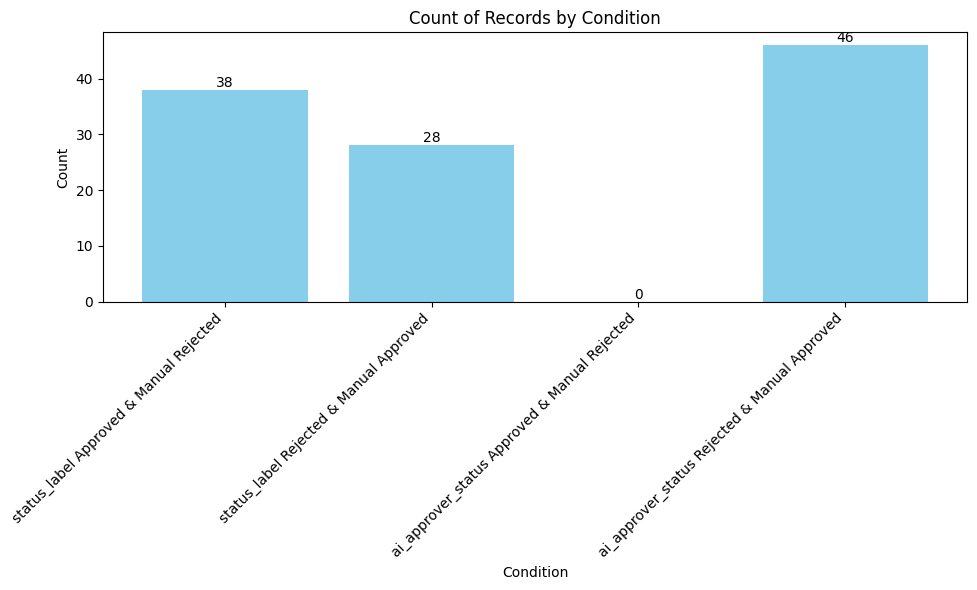

In [102]:
df = manual
# Define conditions and their labels
conditions = {
    'status_label Approved & Manual Rejected': (df['status_label'] == 'Approved') & (df['Manual'] == 'Rejected'),
    'status_label Rejected & Manual Approved': (df['status_label'] == 'Rejected') & (df['Manual'] == 'Approved'),
    'ai_approver_status Approved & Manual Rejected': (df['ai_approver_status'] == 'Approved') & (df['Manual'] == 'Rejected'),
    'ai_approver_status Rejected & Manual Approved': (df['ai_approver_status'] == 'Rejected') & (df['Manual'] == 'Approved')
}

# Count the number of records for each condition
counts = {label: df[condition].shape[0] for label, condition in conditions.items()}

# Plotting the counts in a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(counts.keys(), counts.values(), color='skyblue')

# Add counts on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Labeling the chart
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Count of Records by Condition')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()
